In [1]:
import sys, os

In [2]:
import numpy as np

In [3]:
sys.path.append("/home/anton/BigMac/skoltech/CRISPR_research/notebooks/")

In [4]:
import utils.plot_utils as pu
import utils.hierarcical_utils as hu
import utils.hamiltonian_utils as hamu

In [5]:
from importlib import reload
hu = reload(hu)
hamu = reload(hamu)
pu = reload(pu)

In [6]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

# pairs_path = "../../data/ES_reload/ES/ES2_R1_pairs.txt"
# lines_path = "../../data/ES_reload/ES/ES2_R1_spacers.txt"

pairs_path = "../../data/ES_reload/ES/ES3_R1_pairs.txt"
lines_path = "../../data/ES_reload/ES/ES3_R1_spacers.txt"

# pairs_path = "../../data/SlO_10/SlO1_R1_pairs_10.txt"
# lines_path = "../../data/SlO_10/SlO1_R1_spacers_10.txt"

#pairs_path = "../../data/clostr_06_07/good_1-3_R1_06_07pairsq10.txt"
#lines_path = "../../data/Sasha/Sasha1.fasta"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

# with open(lines_path) as f:
#     lines = [x[:] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]

lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

149254


In [7]:
lines[:5]

['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA']

In [8]:
pairs[:2]

[['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 'ACACGCCCTTATCAAATAGCTGTGATTTACCT'],
 ['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 'ACACGCCCTTATCAAATAGCTGTGATTTACCT']]

In [9]:
s = list(set(lines))
len(s)

2213

In [10]:
40000 / 20

2000.0

In [11]:
s = filtred

NameError: name 'filtred' is not defined

In [19]:
import tqdm
import editdistance as ed
import matplotlib.pyplot as plt

In [40]:
dist_matx = np.zeros((len(s[::10]) , len(s[::10]) ))

for i,a in enumerate(s[::10]):
    for j,b in enumerate(s[::10]):
        dist_matx[i][j] = ed.eval(a, b)

Text(0,0.5,'Log number of spacers')

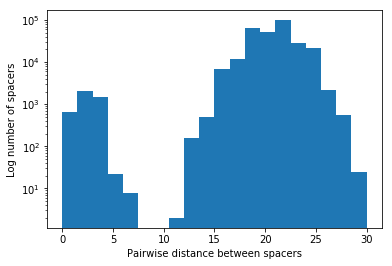

In [42]:
plt.hist(dist_matx.flatten(), bins =20, log= 1)
plt.xlabel("Pairwise distance between spacers")
plt.ylabel("Log number of spacers")

In [12]:
from collections import Counter

In [13]:
c = Counter(lines)

In [14]:
filtred = []
for key in c.keys():
    if c[key] > 5:
        filtred.append(key)
filtred = list(set(filtred))

In [30]:
od = hu.get_ordered_spacers(lines)

AttributeError: module 'utils.hierarcical_utils' has no attribute 'get_ordered_spacers'

In [32]:
answ, sp_to_n, cl_to_n, n_to_cl = hu.squash(od, 6)

A Jupyter Widget

In [41]:
counter = 0
true_keys = set()
for item in answ.items():
    if item[1] > 1:
        counter += 1
        true_keys.add(item[0])

In [46]:
cl_to_n = dict(zip(list(true_keys), np.arange(len(true_keys))))

In [49]:
pairs_cl = hu.process_pairs(pairs, cl_to_n, 6)

A Jupyter Widget

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/anton/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/anton/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/anton/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [50]:
gr = hamu.pairs_to_gr(pairs_cl, len(cl_to_n))

In [51]:
np.save("./13", gr)

In [53]:
import pickle

In [54]:
pickle.dump(cl_to_n, open("./13_cl_to_n", 'wb'))
pickle.dump(answ, open("./13_nd", 'wb'))

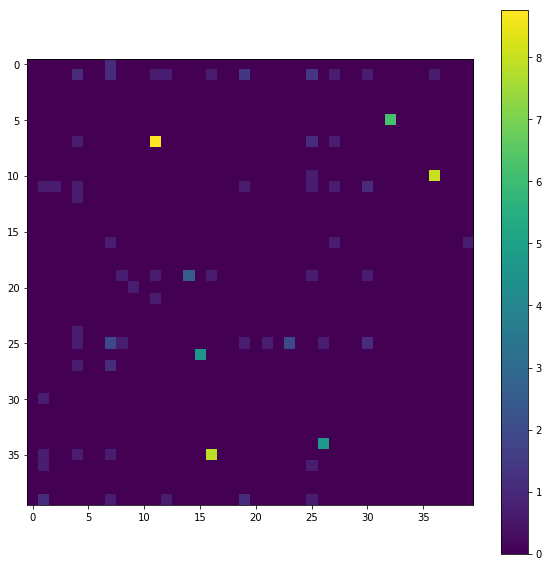

In [58]:
pu.plot_gr(gr[:40, :40], log =1)

In [59]:
arrays, weights = hamu.restore_arrays(gr)

In [60]:
weights

[[9525.0,
  6473.0,
  14240.0,
  6664.0,
  3075.0,
  1631.0,
  6450.0,
  5908.0,
  28595.0,
  11228.0,
  4811.0,
  3908.0,
  4357.0,
  15676.0,
  8721.0,
  3697.0],
 [16996.0,
  8923.0,
  6437.0,
  17285.0,
  6334.0,
  5767.0,
  9980.0,
  7881.0,
  9485.0,
  13099.0,
  14567.0,
  8048.0,
  9510.0,
  2444.0],
 [12051.0, 5593.0, 7841.0, 4714.0, 7276.0],
 [2654.0,
  5111.0,
  6158.0,
  5990.0,
  3789.0,
  10408.0,
  6557.0,
  6916.0,
  4572.0,
  1153.0,
  2245.0,
  214.0],
 [2066.0, 10142.0],
 [2493.0,
  4519.0,
  7590.0,
  8408.0,
  6564.0,
  6134.0,
  9700.0,
  6091.0,
  2579.0,
  3387.0],
 [2340.0,
  1290.0,
  1547.0,
  3121.0,
  1618.0,
  3509.0,
  2656.0,
  3272.0,
  2448.0,
  1423.0,
  3603.0,
  89.0,
  8901.0],
 [3791.0,
  4105.0,
  2758.0,
  3033.0,
  1942.0,
  1779.0,
  4004.0,
  915.0,
  6247.0,
  2449.0,
  4791.0,
  3150.0,
  4174.0,
  5200.0,
  779.0,
  634.0,
  1697.0,
  2432.0,
  4768.0,
  3752.0,
  4579.0,
  2835.0],
 [3796.0, 1322.0, 1711.0, 1782.0, 2360.0],
 [1767.0,
  10

In [83]:
mean_weights = [np.mean(x) for x in weights]

In [84]:
lens = [len(x) for x in arrays]

In [85]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

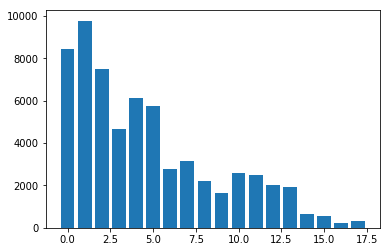

In [86]:
plt.bar(np.arange(18), mean_weights[:18])

In [87]:
with open("../../data/answers/Clo_013316.txt") as f:
    strain1 = [x[:-2].split(",") for x in f.readlines()]

In [88]:
with open("../../data/answers/Clo_009089.txt") as f:
    strain2 = [x[:-2].split(",") for x in f.readlines()]

# investigation

In [89]:
import editdistance as ed
from tqdm import tqdm_notebook

In [92]:
def a_close_to_b(a, b, t = 2):
    return ed.eval(a, b) <= 2

def a_close_to_any_b(a, b, t = 2):
    res = [a_close_to_b(a, x, t) for x in b]
    return any(res), np.where(res)
        

In [94]:
cl1 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain1]

In [95]:
cl2 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain2]

In [96]:
arrays[1]

[233, 91, 218, 62, 7, 11, 214, 82, 228, 1, 185, 208, 141, 27, 237]

In [98]:
mask = []
for i in range(25):
    if a_close_to_any_b(arrays[i], cl1):
        mask.append(1)
    elif a_close_to_any_b(arrays[i], cl2):
        mask.append(2)
    else:
        mask.append(0)


In [199]:
mask

[0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1]

In [241]:
[[hu.find_closest(cl_to_n, x) for x in y] for y in strain2]

[[(2, 'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCAAG'),
  (0, 'TAATCTGACACATACAAAGTTGAACCTAGTGGTACG'),
  (0, 'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA'),
  (0, 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT'),
  (0, 'ATACAACCATATATTTACCAATTATGTACTTATGAA'),
  (0, 'TTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATC'),
  (0, 'TTCATATTCCAAGCGTTTTGCTTACACTTAATAGAA'),
  (1, 'AAAATTAAATTTCATGCTCTTAGACATACATATGCAA'),
  (1, 'TAGATTGCTTTCAAATTACCTCTTGTATAGCGTCTT'),
  (1, 'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTTA'),
  (1, 'TGAACTTTAATCGGTTTTATACAACAATATAACGC'),
  (0, 'TCACACATGAGCAATATCGAAACAGGCAAATCTACA'),
  (0, 'TTCGTAAAATAACAATTATCTGGAATATGAGAAGTT'),
  (0, 'CACTCTTAAGTTGTGACCTATCTGATATATGATTAA'),
  (2, 'TCAATATCTATATTAAGTTTATTTTTAAAAACATCT')],
 [(1, 'GTAGAGTCTTTATATGGTAGAGGTGGAATATATAAGT'),
  (1, 'AACTCTTCAATATCTCCTAATCGTTCAATATAATTCT'),
  (1, 'ACTGTATGCCATCTAAATGCATCATACAAACTTATTT'),
  (0, 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT'),
  (1, 'TTCGCAACTTATGATGGTGAAATGATTACATTAACAG'),
  (2, 'AATATAACAAAGTGGATGTTCTCTAAAAATAAAGAG')],
 [(1,

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

In [100]:
def prepare_pos(arrs, start_x = 0, start_y = 0):
    pos = {}
    x, y = 0, 0
    for arr in arrs:
        print(arr)
        for el in arr:
            pos[el] = (x,y)
            x += 1
        y += 1
        x = 0
    return pos, x, y

In [101]:
def create_shift_pos(pos, x_shift = 0, y_shift = -0.2):
    s_pos = {}
    for item in pos.items():
        s_pos[item[0]] = (item[1][0] + x_shift, item[1][1] + y_shift)
    return s_pos

In [109]:
def add_pos(arr, pos ):
    vertexes = []
    for x in [x for y in arr for x in y]:
        if not x in shift_pos.keys():
            vertexes.append(x)

    for i, v in enumerate(vertexes):
        pos[v] = (i % 10, -1 * (i // 10))
    
    return pos

In [110]:
G1 = nx.DiGraph()
for arr in cl1:
    G1.add_path(arr)
    
G2 = nx.DiGraph()
for arr in cl2:
    G2.add_path(arr)
pos = prepare_pos(cl2 + cl1)[0]

[233, 91, 218, 62, 7, 11, 214, 82, 228, 1, 185, 208, 141, 27, 237]
[230, 225, 44, 19, 188, 263, 268, 281, 173, 73, 288, 45]
[280, 200, 203, 164, 116, 276, 253, 201]
[155, 191, 80, 154, 175, 122, 72, 149, 39, 152, 286, 127, 242]
[229, 151, 19, 150, 22, 261, 113, 210, 196, 51, 66, 239, 269, 83]
[178, 177, 147, 167, 244, 102]
[4, 131, 94]
[30, 144, 132, 278, 159, 70]
[204, 262, 180, 219, 75, 101, 265, 252, 240, 86, 79, 213, 119, 55, 220, 134, 264, 146, 193]
[31, 64, 81, 88, 174, 37, 247, 47, 114, 184, 241, 97, 216, 117]
[105, 99, 166, 109, 171, 222, 176, 10, 36, 257, 42]
[120, 223, 217, 29]
[65, 8, 135, 21, 115]
[77, 110, 161, 90]
[35, 16, 153, 259, 87, 143, 25, 282, 59, 63, 204, 221, 48, 60]
[130, 271, 15, 26, 34, 209, 68, 32, 5]
[87, 262, 180, 12, 129, 172, 71, 140, 61, 118, 148, 58, 277, 45, 157, 46, 275, 40, 92, 186, 270, 279, 78, 199, 205, 24]


In [111]:
Gansw = nx.DiGraph()
for arr in arrays:
    Gansw.add_path(arr)

shift_pos = create_shift_pos(pos)
shift_pos = add_pos(arrays, shift_pos)

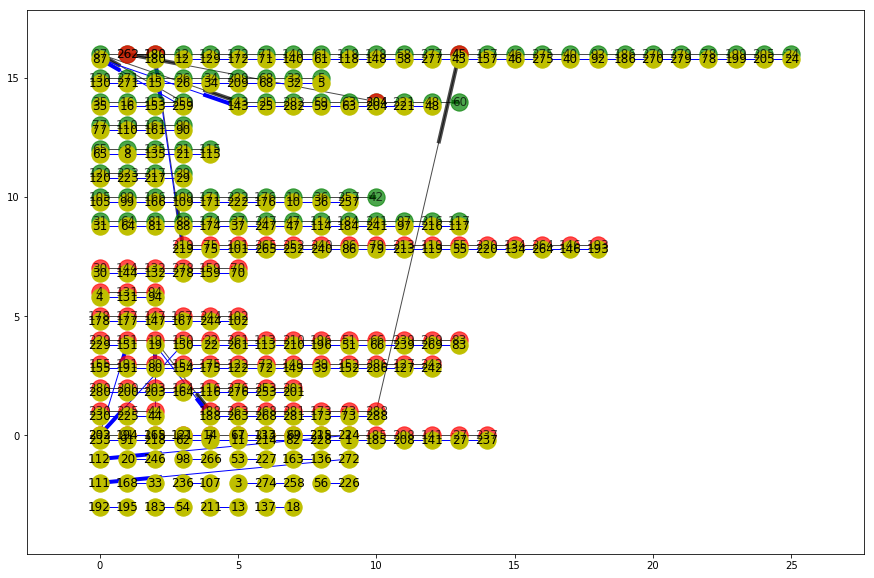

In [112]:
#nx.draw_networkx(G,  alpha = 0.5, pos=pos)
plt.figure(figsize=(15, 10))
nx.draw_networkx(G1, node_color='g', alpha = 0.7, pos=pos)
nx.draw_networkx(G2, node_color='r', alpha = 0.7, pos=pos)

nx.draw_networkx(Gansw, node_color='y', edge_color='b', alpha = 1, pos=shift_pos)

In [113]:
def search_best_alignment(a, b, t = 2):
    answ = ('', '')
    indexes = (-1,-1,-1,-1)
    b_index = -1
    
    for i, x in enumerate(b):
        curr_answ, curr_indexes = best_alignment(a, x, t)
        if len(curr_answ[0]) >= len(answ[0]) and len(curr_answ[1]) >= len(answ[1]):
            answ = curr_answ
            indexes = curr_indexes
            b_index = i
        curr_answ, curr_indexes = best_alignment(a[::-1], x, t)
        if len(curr_answ[0]) >= len(answ[0]) and len(curr_answ[1]) >= len(answ[1]):
            answ = curr_answ
            indexes = curr_indexes
            b_index = i
        
    return answ, b_index, indexes

In [116]:
def best_alignment(a, b, t):
    '''worst implementation of best alignment ever'''
    answ = ('','')
    i1a, i2a, j1a, j2a = -1,-1,-1,-1
    for i1 in range(0, len(a)):
        for i2 in range(i1 + 1, len(a) + 1):
            check_a = a[i1:i2]
            for j1 in range(0, len(b)):
                for j2 in range(j1 + 1,  len(b) + 1):
                    check_b = b[j1:j2]
                    if ed.eval(check_a, check_b) <= t and len(check_a) >= len(answ[0]) and len(check_b) >= len(answ[1]):
                        answ = (check_a, check_b)
                        i1a, i2a, j1a, j2a = i1,i2,j1,j2
    
    return answ, (i1a,i2a,j1a,j2a)


In [117]:
mask1 = []
for c in cl1:
    print(c)
    a = search_best_alignment(c, arrays, 2)
    print(a)
    mask1.append(a[1])
    print("....")

[31, 64, 81, 88, 174, 37, 247, 47, 114, 184, 241, 97, 216, 117]
(([31, 64, 81, 88, 174, 37, 247, 47, 114, 184, 241, 97, 216, 117], [31, 64, 81, 88, 174, 37, 247, 47, 114, 184, 241, 97, 216, 117]), 14, (0, 14, 0, 14))
....
[105, 99, 166, 109, 171, 222, 176, 10, 36, 257, 42]
(([105, 99, 166, 109, 171, 222, 176, 10, 36, 257, 42], [105, 99, 166, 109, 171, 222, 176, 10, 36, 257]), 12, (0, 11, 0, 10))
....
[120, 223, 217, 29]
(([120, 223, 217, 29], [120, 223, 217, 29]), 15, (0, 4, 0, 4))
....
[65, 8, 135, 21, 115]
(([65, 8, 135, 21, 115], [65, 8, 135, 21, 115]), 11, (0, 5, 0, 5))
....
[77, 110, 161, 90]
(([77, 110, 161, 90], [77, 110, 161, 90]), 13, (0, 4, 0, 4))
....
[35, 16, 153, 259, 87, 143, 25, 282, 59, 63, 204, 221, 48, 60]
(([35, 16, 153, 259, 87, 143, 25, 282, 59, 63, 204, 221, 48, 60], [35, 16, 153, 259, 87, 143, 25, 282, 59, 63, 204, 221, 48]), 3, (0, 14, 0, 13))
....
[130, 271, 15, 26, 34, 209, 68, 32, 5]
(([5, 32, 68, 209, 34, 26, 15, 271, 130], [5, 32, 68, 209, 34, 26, 15, 271, 

In [118]:
sorted(mask1)

[3, 7, 11, 12, 13, 14, 15, 16]

In [119]:
mask2 = []
for c in cl2:
    print(c)
    a = search_best_alignment(c, arrays, 2)
    print(a)
    mask2.append(a[1])
    print("....")

[233, 91, 218, 62, 7, 11, 214, 82, 228, 1, 185, 208, 141, 27, 237]
(([233, 91, 218, 62, 7, 11, 214, 82, 228, 1, 185, 208, 141, 27, 237], [233, 91, 218, 62, 7, 11, 214, 82, 228, 1, 185, 208, 141, 27, 237]), 1, (0, 15, 0, 15))
....
[230, 225, 44, 19, 188, 263, 268, 281, 173, 73, 288, 45]
(([230, 225, 44, 19, 188, 263, 268, 281, 173, 73, 288, 45], [230, 225, 44, 19, 188, 263, 268, 281, 173, 73, 288]), 5, (0, 12, 0, 11))
....
[280, 200, 203, 164, 116, 276, 253, 201]
(([280, 200, 203, 164, 116, 276, 253, 201], [280, 200, 203, 164, 116, 276, 253, 201]), 10, (0, 8, 0, 8))
....
[155, 191, 80, 154, 175, 122, 72, 149, 39, 152, 286, 127, 242]
(([155, 191, 80, 154, 175, 122, 72, 149, 39, 152, 286, 127, 242], [155, 191, 80, 154, 175, 122, 72, 149, 39, 152, 286, 127, 242]), 9, (0, 13, 0, 13))
....
[229, 151, 19, 150, 22, 261, 113, 210, 196, 51, 66, 239, 269, 83]
(([83, 269, 239, 66, 51, 196, 210, 113, 261, 22, 150, 19, 151, 229], [83, 269, 239, 66, 51, 196, 210, 113, 261, 22, 150, 202, 151, 229]), 6

In [120]:
m1 = np.zeros(20)
m1[np.array(mask1)] = 1
m2 = np.zeros(20)
m2[np.array(mask2)] = 1

<Container object of 20 artists>

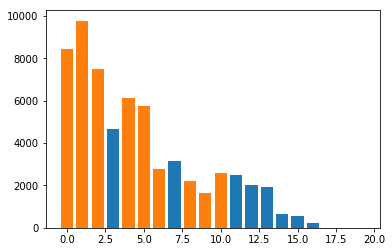

In [121]:
plt.bar(np.arange(20), mean_weights[:20] * m1)
plt.bar(np.arange(20), mean_weights[:20] * m2)

In [478]:
mask1

[14, 12, 17, 11, 13, 6, 18, 10, 15, 16]

In [122]:
gw = 0

for a in cl1 + cl2:
    for x,y in zip(a, a[1:]):

        gw += gr[x,y]
        
(gr.sum() - gw) / gw

0.954449394906376

In [123]:
len(nd)


KeyboardInterrupt



In [124]:
print('asas')

asas


In [125]:
len(answ)

1428

In [126]:
pickle.dump(arrays, open("../../data/clostr_res/arrays_13", 'wb'))

In [127]:
pickle.dump(n_to_cl, open("../../data/clostr_res/n_to_cl_13", 'wb'))

## Check good pairs

In [38]:
import crispr_assembler as ca
import tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
sp_to_n = {}
sp_to_occ = {}
i = 0

for k, v in c.most_common():
    if ca.find_closest(sp_to_n, k)[0] > 7 and v > 20:
        sp_to_occ[k] = v
        sp_to_n[k] = i
        i += 1


In [44]:
pairs_f = []
for p in tqdm.tqdm(pairs):
    match0 = ca.find_closest(sp_to_n, p[0])
    match1 = ca.find_closest(sp_to_n, p[1])
    
#     if p[0] in sp_to_n and p[1] in sp_to_n:
#         pairs_f.append([sp_to_n[p[0]], sp_to_n[p[1]]])
    if match0[0] < 1 and match1[0] < 1:
        pairs_f.append([sp_to_n[match0[1]], sp_to_n[match1[1]]])

100%|██████████| 74627/74627 [00:10<00:00, 7105.82it/s]


In [45]:
gr = ca.graph_from_arrays(pairs_f)[0]

In [46]:
len(pairs_f)

30440

In [47]:
len(pairs)

74627

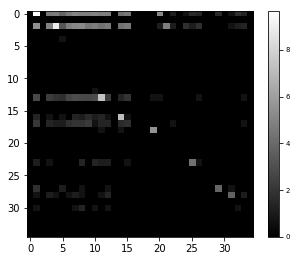

In [48]:
ca.plot_gr(gr, log = 1)